In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split    
from sklearn.metrics import r2_score

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           2.83e-91
Time:                        17:44:10   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.0

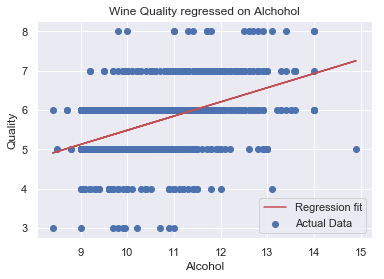

In [8]:
wine_quality = pd.read_csv("winequality-red.csv",sep=';')  
wine_quality.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)
model = sm.OLS(wine_quality['quality'],sm.add_constant(wine_quality['alcohol'])).fit()
 
print (model.summary())

plt.scatter(wine_quality['alcohol'],wine_quality['quality'],label = 'Actual Data')
plt.plot(wine_quality['alcohol'],model.params[0]+model.params[1]*wine_quality['alcohol'],
         c ='r',label="Regression fit")
plt.title('Wine Quality regressed on Alchohol')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()



Intercept (B0): 1.6918 Co-efficient (B1): 0.377
Test R-squared value: 0.185


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


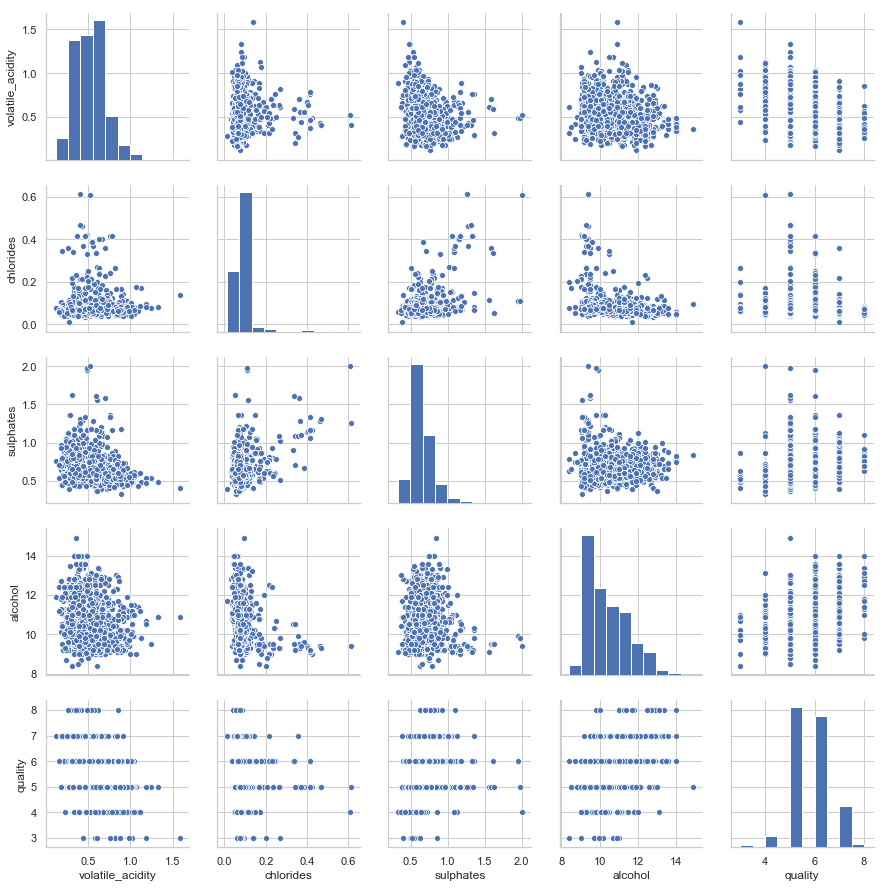

In [9]:
x_train,x_test,y_train,y_test = train_test_split(wine_quality['alcohol'],wine_quality["quality"],train_size = 0.7,random_state=42)

x_train = pd.DataFrame(x_train);x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train);y_test = pd.DataFrame(y_test)

def mean(values):
    return round(sum(values)/float(len(values)),2)

alcohol_mean = mean(x_train['alcohol'])
quality_mean = mean(y_train['quality'])

alcohol_variance = round(sum((x_train['alcohol'] - alcohol_mean)**2),2)
quality_variance = round(sum((y_train['quality'] - quality_mean)**2),2)

covariance = round(sum((x_train['alcohol'] - alcohol_mean) * (y_train['quality'] - quality_mean )),2)
b1 = covariance/alcohol_variance
b0 = quality_mean - b1*alcohol_mean
print ("\n\nIntercept (B0):",round(b0,4),"Co-efficient (B1):",round(b1,4))
y_test["y_pred"] = pd.DataFrame(b0+b1*x_test['alcohol'])
R_sqrd = 1- ( sum((y_test['quality']-y_test['y_pred'])**2) / sum((y_test['quality'] - mean(y_test['quality']))**2 ))
print ("Test R-squared value:",round(R_sqrd,4))

eda_colnms = [ 'volatile_acidity',  'chlorides', 'sulphates', 'alcohol','quality']
sns.set(style='whitegrid',context = 'notebook')
sns.pairplot(wine_quality[eda_colnms],size = 2.5,x_vars= eda_colnms,y_vars=eda_colnms)

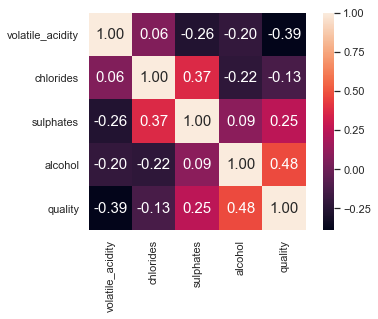

In [10]:
corr_mat = np.corrcoef(wine_quality[eda_colnms].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True, fmt='.2f', 
                       annot_kws={'size': 15}, yticklabels=eda_colnms, xticklabels=eda_colnms)

In [12]:
colnms = [ 'volatile_acidity',  'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
 'pH', 'sulphates', 'alcohol']

pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)

np.random.seed(13)
full_mod = sm.OLS(y_train,x_train_new)
full_res = full_mod.fit()
print ("\n \n",full_res.summary())


print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))

y_pred = full_res.predict(x_test_new)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['y_pred']
pred_data = pd.DataFrame(y_pred_df['y_pred'])
y_test_new = pd.DataFrame(y_test)
#y_test_new.reset_index(inplace=True)

pred_data['y_test'] = pd.DataFrame(y_test_new['quality'])

rsqd = r2_score(y_test_new['quality'].tolist(), y_pred_df['y_pred'].tolist())
print ("\nTest R-squared value:",round(rsqd,4))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.21
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          4.31e-103
Time:                        17:46:20   Log-Likelihood:                -1104.7
No. Observations:                1119   AIC:                             2225.
Df Residuals:                    1111   BIC:                             2266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9

In [13]:
from sklearn.linear_model import Ridge
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']

pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)

alphas = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10.0]

initrsq = 0

print ("\nRidge Regression: Best Parameters\n")
for alph in alphas:
    ridge_reg = Ridge(alpha=alph) 
    ridge_reg.fit(x_train,y_train)    
    tr_rsqrd = ridge_reg.score(x_train,y_train)
    ts_rsqrd = ridge_reg.score(x_test,y_test)    

    if ts_rsqrd > initrsq:
        print ("Lambda: ",alph,"Train R-Squared value:",round(tr_rsqrd,5),"Test R-squared value:",round(ts_rsqrd,5))
        initrsq = ts_rsqrd


ridge_reg = Ridge(alpha=0.001) 
ridge_reg.fit(x_train,y_train) 
 

print ("\nRidge Regression coefficient values of Alpha = 0.001\n")
for i in range(11):
    print (all_colnms[i],": ",ridge_reg.coef_[i])


Ridge Regression: Best Parameters

Lambda:  0.0001 Train R-Squared value: 0.3612 Test R-squared value: 0.35135

Ridge Regression coefficient values of Alpha = 0.001

fixed_acidity :  0.015506587508043302
volatile_acidity :  -1.105098235487688
citric_acid :  -0.2487986553235083
residual_sugar :  0.004018895392834925
chlorides :  -1.6843839620863474
free_sulfur_dioxide :  0.004636901710963166
total_sulfur_dioxide :  -0.0032837679041055217
density :  -5.56727174680267
pH :  -0.3624800172040076
sulphates :  0.8009191228025612
alcohol :  0.2999182442952106


In [14]:
from sklearn.linear_model import Lasso

alphas = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10.0]
initrsq = 0
print ("\nLasso Regression: Best Parameters\n")

for alph in alphas:
    lasso_reg = Lasso(alpha=alph) 
    lasso_reg.fit(x_train,y_train)    
    tr_rsqrd = lasso_reg.score(x_train,y_train)
    ts_rsqrd = lasso_reg.score(x_test,y_test)    

    if ts_rsqrd > initrsq:
        print ("Lambda: ",alph,"Train R-Squared value:",round(tr_rsqrd,5),"Test R-squared value:",round(ts_rsqrd,5))
        initrsq = ts_rsqrd


lasso_reg = Lasso(alpha=0.001) 
lasso_reg.fit(x_train,y_train) 

print ("\nLasso Regression coefficient values of Alpha = 0.001\n")
for i in range(11):
    print (all_colnms[i],": ",lasso_reg.coef_[i])


Lasso Regression: Best Parameters

Lambda:  0.0001 Train R-Squared value: 0.36101 Test R-squared value: 0.35057

Lasso Regression coefficient values of Alpha = 0.001

fixed_acidity :  0.01414954636906243
volatile_acidity :  -1.0906236090493846
citric_acid :  -0.1852951500473701
residual_sugar :  -0.0001366102467872051
chlorides :  -1.0587757970410068
free_sulfur_dioxide :  0.0048316481751489865
total_sulfur_dioxide :  -0.003267228855959229
density :  -0.0
pH :  -0.25690192587072974
sulphates :  0.694487540316411
alcohol :  0.30775614912428073
